<a href="https://colab.research.google.com/github/karthikmohan1702/EVA6/blob/main/S8_Resnet_GradCam/Resnet_Grad_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google drive
# ------------
from google.colab import drive
import sys
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchsummary
!pip install -U albumentations

     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 38.2MB 73kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
# Cloning repo to get all the essentials
!git clone https://github.com/karthikmohan1702/vision_wrapper.git

Cloning into 'vision_wrapper'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [4]:
# Github Imports
# ==============
from vision_wrapper import utils
from vision_wrapper.utils import get_cifar10_dataset
from vision_wrapper import main 
from vision_wrapper.model.resnet_models import ResNet18

### Data Analysis

In [5]:
device = utils.get_device_info()
train_set = get_cifar10_dataset(root="~/data/cifar10", download=True)
test_set = get_cifar10_dataset(root='~/data/cifar10', train=False, download=True)
train_loader, test_loader = utils.train_test_loader(train_set, test_set, batch_size = 128)


cuda



Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10
Files already downloaded and verified


**View the Images that are present in the dataset**

Classes present in the dataset ==>  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


automobile airplane   truck    bird    bird


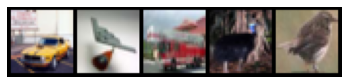

In [6]:
utils.plot_sample_img(train_set, test_set, batch_size=5)

**Size of Train & Test Dataset**


In [7]:
print("Train dataset size")
print("==="*6)
print(train_set)
print("\n")
print("Test dataset size")
print("==="*6)
print(test_set)

Train dataset size
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /root/data/cifar10
    Split: Train
    StandardTransform
Transform: ToTensor()


Test dataset size
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /root/data/cifar10
    Split: Test
    StandardTransform
Transform: ToTensor()


**Mean & std deviation**

In [8]:
mean, std = utils.get_mean_std(train_loader)
print("\n\n","mean ==> ", mean, "\n","std ==> ", std)

100%|██████████| 391/391 [00:05<00:00, 73.69it/s]



 mean ==>  tensor([0.4914, 0.4822, 0.4465]) 
 std ==>  tensor([0.2470, 0.2435, 0.2616])


**Albumentations**

In [9]:
train_transform, test_transform = utils.albumentaion_transform(mean.tolist(), std.tolist())

**Data Loader**

In [10]:
trainset= utils.get_cifar10_dataset(transform=train_transform)
testset= utils.get_cifar10_dataset(train= False, transform= test_transform)
batch_size = 128

train_loader, test_loader = utils.train_test_loader(trainset, testset, batch_size)

Files already downloaded and verified
Files already downloaded and verified


**Summary**

In [11]:
utils.get_model_summary(model=ResNet18(), input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

### Run Model

In [12]:
train_losses, test_losses, train_acc, test_acc = main.run_model(train_loader, test_loader, model=ResNet18(), epochs=20, device=device)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3196622133255005 Batch_id=390 Accuracy=42.62: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 5303/10000 (53.03%)

EPOCH: 1


Loss=1.0610554218292236 Batch_id=390 Accuracy=60.22: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6737/10000 (67.37%)

EPOCH: 2


Loss=0.8633348345756531 Batch_id=390 Accuracy=67.65: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7566/10000 (75.66%)

EPOCH: 3


Loss=0.7409740686416626 Batch_id=390 Accuracy=72.01: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7626/10000 (76.26%)

EPOCH: 4


Loss=0.7428967952728271 Batch_id=390 Accuracy=74.96: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7884/10000 (78.84%)

EPOCH: 5


Loss=0.5543815493583679 Batch_id=390 Accuracy=77.89: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8330/10000 (83.30%)

EPOCH: 6


Loss=0.6126499772071838 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8188/10000 (81.88%)

EPOCH: 7


Loss=0.44217491149902344 Batch_id=390 Accuracy=80.87: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8406/10000 (84.06%)

EPOCH: 8


Loss=0.5811246633529663 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8134/10000 (81.34%)

EPOCH: 9


Loss=0.5294909477233887 Batch_id=390 Accuracy=82.98: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8606/10000 (86.06%)

EPOCH: 10


Loss=0.5890915989875793 Batch_id=390 Accuracy=84.38: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8502/10000 (85.02%)

EPOCH: 11


Loss=0.4519123136997223 Batch_id=390 Accuracy=85.06: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8620/10000 (86.20%)

EPOCH: 12


Loss=0.4564947187900543 Batch_id=390 Accuracy=85.92: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8496/10000 (84.96%)

EPOCH: 13


Loss=0.28550979495048523 Batch_id=390 Accuracy=86.59: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8683/10000 (86.83%)

EPOCH: 14


Loss=0.2972761392593384 Batch_id=390 Accuracy=87.39: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8770/10000 (87.70%)

EPOCH: 15


Loss=0.25836020708084106 Batch_id=390 Accuracy=87.60: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8716/10000 (87.16%)

EPOCH: 16


Loss=0.2927214801311493 Batch_id=390 Accuracy=88.46: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8740/10000 (87.40%)

EPOCH: 17


Loss=0.40868210792541504 Batch_id=390 Accuracy=88.90: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8767/10000 (87.67%)

EPOCH: 18


Loss=0.3036760985851288 Batch_id=390 Accuracy=89.32: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8806/10000 (88.06%)

EPOCH: 19


Loss=0.3504355549812317 Batch_id=390 Accuracy=89.71: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]



Test set: Average loss: 0.0029, Accuracy: 8842/10000 (88.42%)



### Misclassified images

Files already downloaded and verified


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

cuda



/content/vision_wrapper/utils.py:316: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean_norm = torch.tensor(mean).reshape(1, 3, 1, 1)
/content/vision_wrapper/utils.py:317: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std_norm = torch.tensor(std).reshape(1, 3, 1, 1)


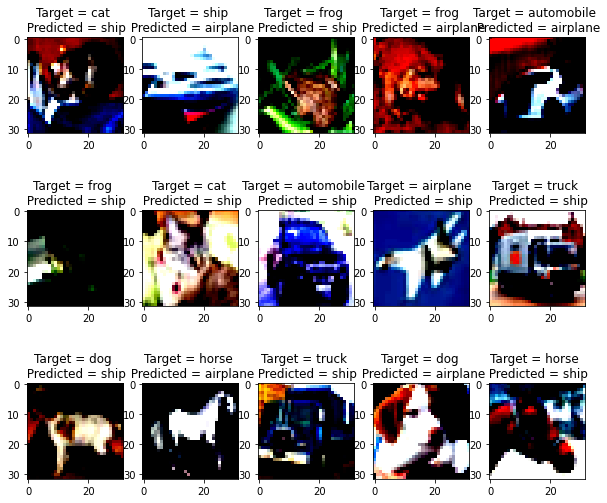

In [13]:
utils.misclassified_images(ResNet18(), trainset.classes, test_transform, trainset, testset)

## Grad_cam

cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

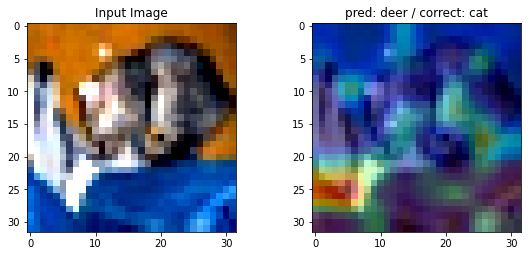

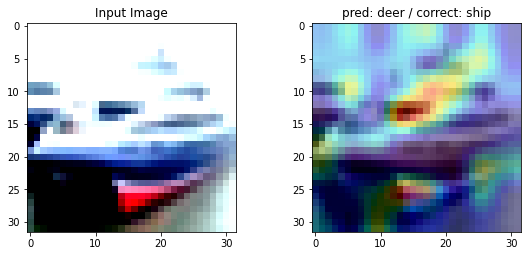

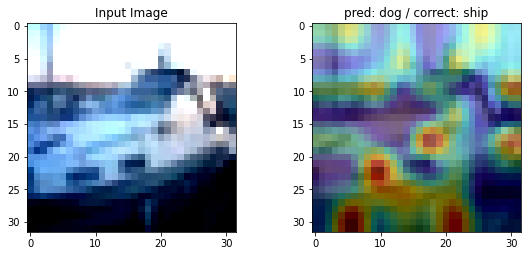

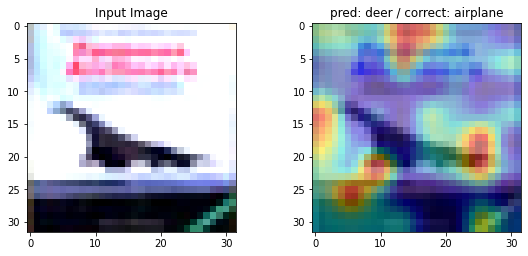

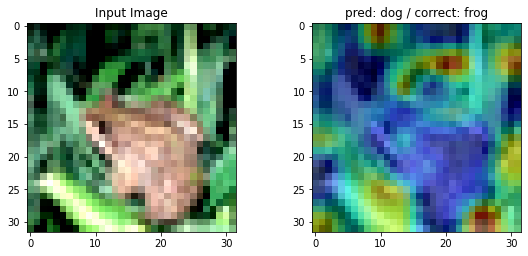

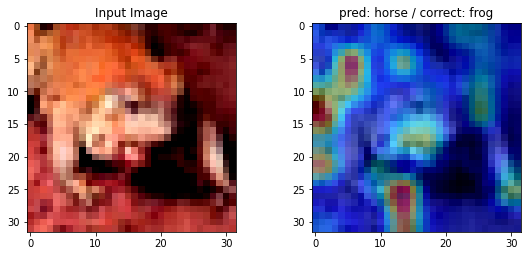

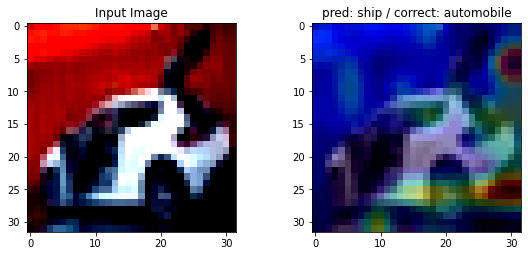

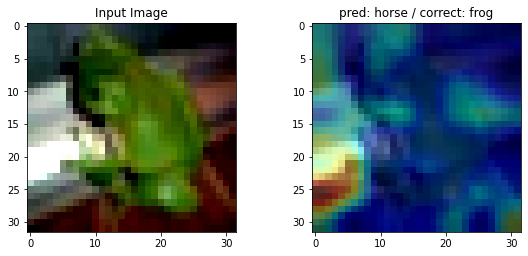

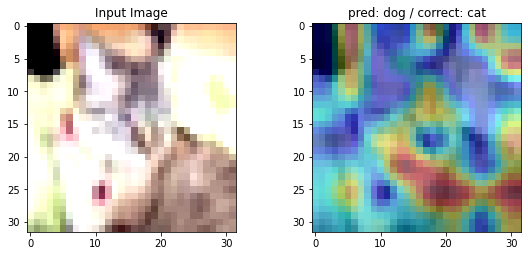

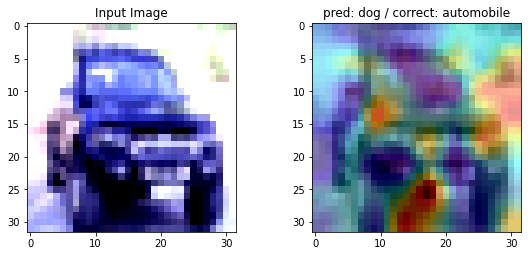

In [14]:
model = ResNet18().to(device)
utils.plot_grad_cam(test_loader, model, train_set.classes, samples=10)